# Análise de Microdados do ENEM 2019

### Este projeto tem como intuito, mostrar de forma clara, a análise de dados do ENEM 2019, que compara os aspectos dos candidatos sem deficiência e candidatos com **baixa visão**. 

## Quais análises esperam ser feitas?
* Comparação das notas das provas do ENEM 2019 de participantes com visão normal e baixa visão
* Comparação dos acertos das provas AZUL e ROSA do ENEM 2019 dos participantes com visão normal e baixa visão

## 0.0 Importando as bibliotecas:

In [80]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## 1.0 Dados

### 1.1 Importando o data frame:

In [81]:
dataPath = "../data/MICRODADOS_ENEM_2019.csv.zip"
dataFrame = pd.read_csv(dataPath, sep=';', encoding="ISO-8859-1", chunksize=1000000)
dataFrame = pd.concat(dataFrame, ignore_index=True)

### 1.1 Mostrando parte do data frame:

In [82]:
dataFrame.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


### 1.2 Fazendo uma cópia do data frame original:

In [83]:
microdados_dataFrame = dataFrame
dataFrame = 0

In [84]:
microdados_dataFrame.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

### 1.3 Selecionando apenas as colunas úteis:

In [85]:
colunasParaAnalise = ['NU_INSCRICAO',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'NU_NOTA_REDACAO', 
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [86]:
microdados_filtrados = microdados_dataFrame.filter(items=colunasParaAnalise)

In [87]:
micro_pd = microdados_filtrados
micro_pd.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_BAIXA_VISAO,IN_CEGUEIRA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,21,M,3,1,0,0,1,1,1,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,16,F,3,1,0,0,1,1,1,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,18,F,1,3,0,0,1,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,23,M,3,2,0,0,0,0,0,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,23,M,3,1,0,0,0,0,0,...,A,A,A,B,A,A,D,A,A,A


Redução de 82 colunas do data frame original!

### 1.4 Removendo colunas com valor NaN:

In [88]:
selecao_colunas = ['NU_NOTA_CN','Q025']
interNota = micro_pd.filter(items=selecao_colunas)
selecao_colunas1 = ['IN_BAIXA_VISAO','Q025']
interVisao = micro_pd.filter(items=selecao_colunas1)
selecao_colunas2 = ['NU_NOTA_CN','IN_BAIXA_VISAO']
visaoNota = micro_pd.filter(items=selecao_colunas2)

In [89]:
# Excluindo, no data frame, os atributos das colunas selecionadas, com valor NaN:
internetNota = interNota.dropna()
baixavisaoNota = visaoNota.dropna()
internetVisao = interVisao.dropna()

## 2.0 Dados dos participantes

### 2.1 Participantes com visão normal

In [90]:
dados_normais = micro_pd[micro_pd.IN_BAIXA_VISAO==0]

#### 2.1.1 Filtrando os dados dos participantes com visão normal:

In [91]:
nota_normal_cn = dados_normais["NU_NOTA_CN"]
nota_normal_ch = dados_normais['NU_NOTA_CH']
nota_normal_lc = dados_normais['NU_NOTA_LC']
nota_normal_mt = dados_normais['NU_NOTA_MT']

# Pessoas com a visão normal:
baixaVisao_normal = dados_normais["IN_BAIXA_VISAO"]

# Dados complementares das pessoas com a visão normal:
pessoa_normal = dados_normais["Q005"]
renda_normal = dados_normais["Q006"]
quarto_normal = dados_normais["Q009"]
geladeira_normal = dados_normais["Q012"]
celular_normal = dados_normais["Q022"]
computador_normal = dados_normais["Q024"]
internet_normal = dados_normais["Q025"]
idadeAluno_normal = dados_normais["NU_IDADE"]
sexoAluno_normal = dados_normais["TP_SEXO"]
cor_normal = dados_normais["TP_COR_RACA"]

### 2.2 Participantes com baixa visão

In [92]:
dados_bv = micro_pd[micro_pd.IN_BAIXA_VISAO==1]

#### 2.2.1 Filtrando os dados dos participantes com baixa visão:

In [93]:
nota_bv_cn = dados_bv["NU_NOTA_CN"]
nota_bv_ch = dados_bv["NU_NOTA_CH"]
nota_bv_lc = dados_bv["NU_NOTA_LC"]
nota_bv_mt = dados_bv['NU_NOTA_MT']

# Pessoas com a baixa visão:
baixavisao = dados_bv['IN_BAIXA_VISAO']

# Dados complementares das pessoas com baixa visão:
pessoa_bv = dados_bv["Q005"]
renda_bv = dados_bv["Q006"]
quarto_bv = dados_bv["Q009"]
geladeira_bv = dados_bv["Q012"]
celular_bv = dados_bv["Q022"]
computador_bv = dados_bv["Q024"]
internet_bv = dados_bv["Q025"]
idadeAluno_bv = dados_bv["NU_IDADE"]
sexoAluno_bv = dados_bv["TP_SEXO"]
cor_bv = dados_bv["TP_COR_RACA"]

## 3.0 Resultado das Análises

### 3.1 Comparando as notas entre os participantes com baixa visão e visão normal:

In [94]:
# Obtendo a idade dos participantes:
idade_normal = idadeAluno_normal
idade_bv = idadeAluno_bv

#### 3.1.1 Gráfico que compara as notas na matéria de **Ciências da Natureza**, entre os participantes com baixa visão e visão normal:

In [95]:
# Obtendo as notas de CN dos participantes:
y0 = nota_normal_cn
y1= nota_bv_cn

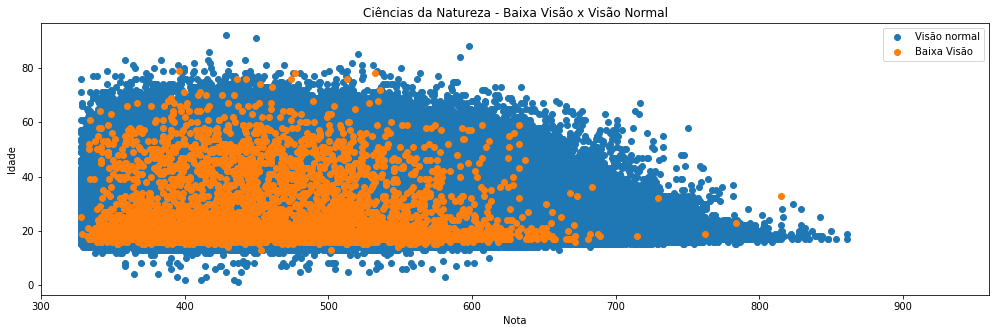

In [96]:
# Restringindo a quantidade de dados:
limits = [300, 960]
plt.figure(figsize = (17,5))

plt.scatter(y0, idade_normal, label="Visão normal")
plt.scatter(y1, idade_bv, label="Baixa Visão")
plt.xlim(limits)
plt.xlabel("Nota")
plt.ylabel("Idade")
plt.legend()
plt.title('Ciências da Natureza - Baixa Visão x Visão Normal');

#### 3.1.2 Gráfico que compara as notas na matéria de **Ciências Humanas**, entre os participantes com baixa visão e visão normal:

In [97]:
# Obtendo as notas de CH dos participantes:
y0 = nota_normal_ch
y1= nota_bv_ch

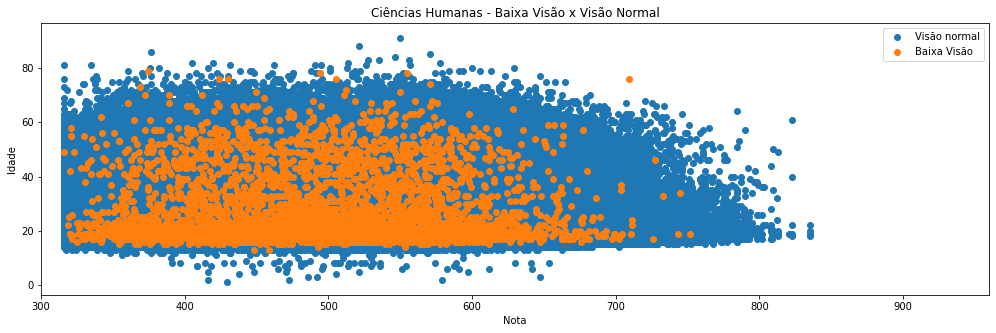

In [98]:
# Restringindo a quantidade de dados:
limits = [300, 960]
plt.figure(figsize = (17,5))

plt.scatter(y0, idade_normal, label="Visão normal")
plt.scatter(y1, idade_bv, label="Baixa Visão")
plt.xlim(limits)
plt.xlabel("Nota")
plt.ylabel("Idade")
plt.legend()
plt.title('Ciências Humanas - Baixa Visão x Visão Normal');

#### 3.1.3 Gráfico que compara as notas na matéria de **Linguagens**, entre os participantes com baixa visão e visão normal:

In [99]:
# Obtendo as notas de LC dos participantes:
y0 = nota_normal_lc
y1= nota_bv_lc

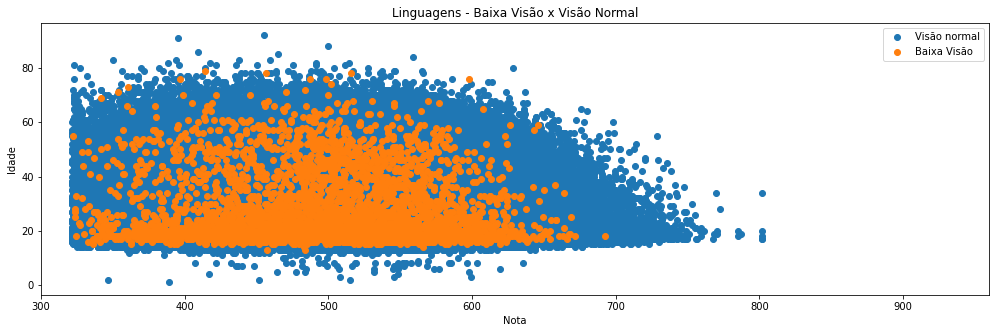

In [100]:
# Restringindo a quantidade de dados:
limits = [300, 960]
plt.figure(figsize = (17,5))

plt.scatter(y0, idade_normal, label="Visão normal")
plt.scatter(y1, idade_bv, label="Baixa Visão")
plt.xlim(limits)
plt.xlabel("Nota")
plt.ylabel("Idade")
plt.legend()
plt.title('Linguagens - Baixa Visão x Visão Normal');

#### 3.1.4 Gráfico que compara as notas na matéria de **Matemática**, entre os participantes com baixa visão e visão normal:

In [101]:
# Obtendo as notas de MAT dos participantes:
y0 = nota_normal_mt
y1= nota_bv_mt

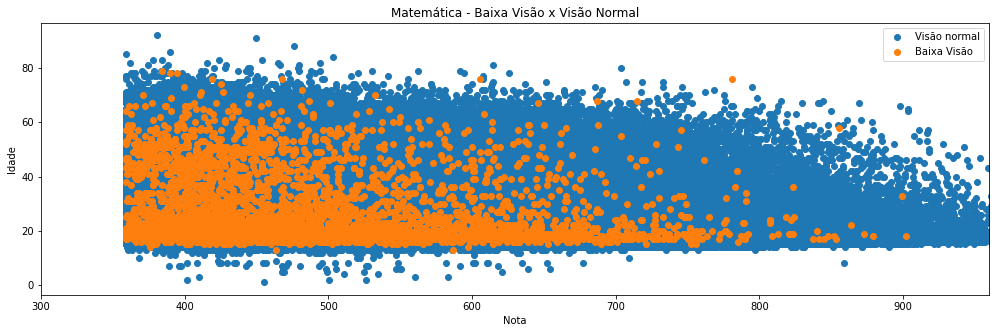

In [102]:
# Restringindo a quantidade de dados:
limits = [300, 960]
plt.figure(figsize = (17,5))

plt.scatter(y0, idade_normal, label="Visão normal")
plt.scatter(y1, idade_bv, label="Baixa Visão")
plt.xlim(limits)
plt.xlabel("Nota")
plt.ylabel("Idade")
plt.legend()
plt.title('Matemática - Baixa Visão x Visão Normal');

### 3.2 Comparando a quantidade de acertos das provas **AZUL** dos participantes com baixa visão e visão normal 

#### 3.2.1 Filtrando os dados da prova AZUL de **Ciências da Natureza**:

##### 3.2.1.1 Pessoas com visão normal:

In [103]:
# Buscando no data frame a prova de CN das pessoas com visão normal:
prova_cn_normal = dados_normais[dados_normais.CO_PROVA_CN==503]
prova_cn_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CN', 'TX_GABARITO_CN']
p_cn_normal = prova_cn_normal.filter(items = P)

respostas_cn_normal = p_cn_normal['TX_RESPOSTAS_CN']
gabarito_cn_normal = p_cn_normal['TX_GABARITO_CN']

In [104]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_cn = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_cn_normal[j]
    linha_do_gabarito = gabarito_cn_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_cn[i] = acertos_normais_cn[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.2.1.2 Pessoas com baixa visão:

In [105]:
# Buscando no data frame a prova de CN das pessoas com baixa visão:
prova_cn_bv = dados_bv[dados_bv.CO_PROVA_CN==503]
prova_cn_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CN', 'TX_GABARITO_CN']
p_cn_bv = prova_cn_bv.filter(items = P)

respostas_cn_bv = p_cn_bv['TX_RESPOSTAS_CN']
gabarito_cn_bv = p_cn_bv['TX_GABARITO_CN']

In [106]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_cn = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_cn_bv[j]
    linha_do_gabarito = gabarito_cn_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_cn[i] = acertos_bv_cn[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.2.2 Gráfico dos acertos da prova AZUL de **Ciências da Natureza** dos participantes de baixa visão e visão normal:

In [107]:
acertos_normal_pd_cn = pd.DataFrame(acertos_normais_cn)
acertos_bv_pd_cn = pd.DataFrame(acertos_bv_cn)

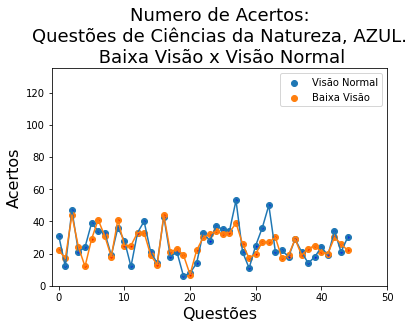

In [108]:
x = acertos_normal_pd_cn
y = acertos_normal_pd_cn.index

x1 = acertos_bv_pd_cn
y1 = acertos_bv_pd_cn.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Ciências da Natureza, AZUL.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

#### 3.2.3 Filtrando os dados da prova AZUL de **Ciências Humanas**:

##### 3.2.3.1 Pessoas com visão normal:

In [109]:
# Buscando no data frame a prova de CH das pessoas com visão normal:
prova_ch_normal = dados_normais[dados_normais.CO_PROVA_CH==507]
prova_ch_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CH', 'TX_GABARITO_CH']
p_ch_normal = prova_ch_normal.filter(items = P)

respostas_ch_normal = p_ch_normal['TX_RESPOSTAS_CH']
gabarito_ch_normal = p_ch_normal['TX_GABARITO_CH']

In [110]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_ch = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_ch_normal[j]
    linha_do_gabarito = gabarito_ch_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_ch[i] = acertos_normais_ch[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.2.3.2 Pessoas com baixa visão:

In [111]:
# Buscando no data frame a prova de CH das pessoas com baixa visão:
prova_ch_bv = dados_bv[dados_bv.CO_PROVA_CH==507]
prova_ch_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CH', 'TX_GABARITO_CH']
p_ch_bv = prova_ch_bv.filter(items = P)

respostas_ch_bv = p_ch_bv['TX_RESPOSTAS_CH']
gabarito_ch_bv = p_ch_bv['TX_GABARITO_CH']

In [112]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_ch = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_ch_bv[j]
    linha_do_gabarito = gabarito_ch_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_ch[i] = acertos_bv_ch[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.2.4 Gráfico dos acertos da prova AZUL de **Ciências Humanas** dos participantes de baixa visão e visão normal:

In [113]:
acertos_normal_pd_ch = pd.DataFrame(acertos_normais_ch)
acertos_bv_pd_ch = pd.DataFrame(acertos_bv_ch)

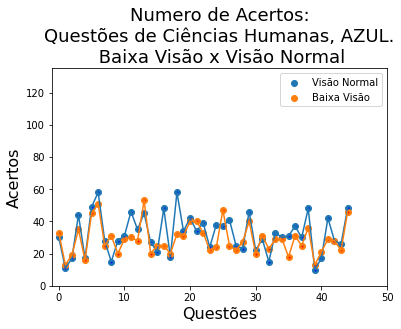

In [114]:
x = acertos_normal_pd_ch
y = acertos_normal_pd_ch.index

x1 = acertos_bv_pd_ch
y1 = acertos_bv_pd_ch.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Ciências Humanas, AZUL.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

#### 3.2.5 Filtrando os dados da prova AZUL de **Linguagens**:

##### 3.2.5.1 Pessoas com visão normal:

In [115]:
# Buscando no data frame a prova de LC das pessoas com visão normal:
prova_lc_normal = dados_normais[dados_normais.CO_PROVA_LC==511]
prova_lc_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_LC', 'TX_GABARITO_LC']
p_lc_normal = prova_lc_normal.filter(items = P)

respostas_lc_normal = p_lc_normal['TX_RESPOSTAS_LC']
gabarito_lc_normal = p_lc_normal['TX_GABARITO_LC']

In [116]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_lc = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_lc_normal[j]
    linha_do_gabarito = gabarito_lc_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_lc[i] = acertos_normais_lc[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.2.5.2 Pessoas com baixa visão:

In [117]:
# Buscando no data frame a prova de LC das pessoas com baixa visão:
prova_lc_bv = dados_bv[dados_bv.CO_PROVA_LC==511]
prova_lc_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_LC', 'TX_GABARITO_LC']
p_lc_bv = prova_lc_bv.filter(items = P)

respostas_lc_bv = p_lc_bv['TX_RESPOSTAS_LC']
gabarito_lc_bv = p_lc_bv['TX_GABARITO_LC']

In [118]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_lc = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_lc_bv[j]
    linha_do_gabarito = gabarito_lc_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_lc[i] = acertos_bv_lc[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.2.6 Gráfico dos acertos da prova AZUL de **Linguagens** dos participantes de baixa visão e visão normal:

In [119]:
acertos_normal_pd_lc = pd.DataFrame(acertos_normais_lc)
acertos_bv_pd_lc = pd.DataFrame(acertos_bv_lc)

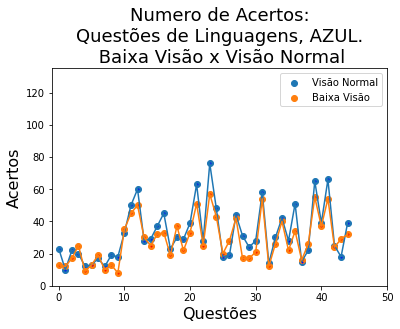

In [120]:
x = acertos_normal_pd_lc
y = acertos_normal_pd_lc.index

x1 = acertos_bv_pd_lc
y1 = acertos_bv_pd_lc.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Linguagens, AZUL.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=[ 'Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

#### 3.2.7 Filtrando os dados da prova AZUL de **Matemática**:

##### 3.2.7.1 Pessoas com visão normal:

In [121]:
# Buscando no data frame a prova de MT das pessoas com visão normal:
prova_mt_normal = dados_normais[dados_normais.CO_PROVA_MT==515]
prova_mt_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_MT', 'TX_GABARITO_MT']
p_mt_normal = prova_mt_normal.filter(items = P)

respostas_mt_normal = p_mt_normal['TX_RESPOSTAS_MT']
gabarito_mt_normal = p_mt_normal['TX_GABARITO_MT']

In [122]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_mt = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_mt_normal[j]
    linha_do_gabarito = gabarito_mt_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_mt[i] = acertos_normais_mt[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.2.7.2 Pessoas com baixa visão:

In [123]:
# Buscando no data frame a prova de MT das pessoas com baixa visão:
prova_mt_bv = dados_bv[dados_bv.CO_PROVA_MT==515]
prova_mt_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_MT', 'TX_GABARITO_MT']
p_mt_bv = prova_mt_bv.filter(items = P)

respostas_mt_bv = p_mt_bv['TX_RESPOSTAS_MT']
gabarito_mt_bv = p_mt_bv['TX_GABARITO_MT']

In [124]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_mt = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_mt_bv[j]
    linha_do_gabarito = gabarito_mt_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_mt[i] = acertos_bv_mt[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.2.8 Gráfico dos acertos da prova AZUL de **Matemática** dos participantes de baixa visão e visão normal:

In [125]:
acertos_normal_pd_mt = pd.DataFrame(acertos_normais_mt)
acertos_bv_pd_mt = pd.DataFrame(acertos_bv_mt)

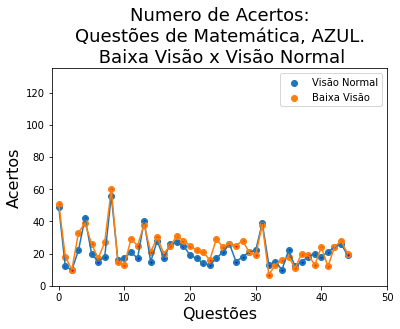

In [126]:
x = acertos_normal_pd_mt
y = acertos_normal_pd_mt.index

x1 = acertos_bv_pd_mt
y1 = acertos_bv_pd_mt.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Matemática, AZUL.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

### 3.3 Comparando a quantidade de acertos das provas **ROSA** dos participantes com baixa visão e visão normal 

#### 3.3.1 Filtrando os dados da prova ROSA de **Ciências da Natureza**:


##### 3.3.1.1 Pessoas com visão normal:


In [127]:
# Buscando no data frame a prova de CN das pessoas com visão normal:
prova_cn_normal = dados_normais[dados_normais.CO_PROVA_CN==506]
prova_cn_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CN', 'TX_GABARITO_CN']
p_cn_normal = prova_cn_normal.filter(items = P)

respostas_cn_normal = p_cn_normal['TX_RESPOSTAS_CN']
gabarito_cn_normal = p_cn_normal['TX_GABARITO_CN']

In [128]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_cn = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_cn_normal[j]
    linha_do_gabarito = gabarito_cn_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_cn[i] = acertos_normais_cn[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.3.1.2 Pessoas com baixa visão:


In [129]:
# Buscando no data frame a prova de CN das pessoas com baixa visão:
prova_cn_bv = dados_bv[dados_bv.CO_PROVA_CN==506]
prova_cn_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CN', 'TX_GABARITO_CN']
p_cn_bv = prova_cn_bv.filter(items = P)

respostas_cn_bv = p_cn_bv['TX_RESPOSTAS_CN']
gabarito_cn_bv = p_cn_bv['TX_GABARITO_CN']

In [130]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_cn = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_cn_bv[j]
    linha_do_gabarito = gabarito_cn_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_cn[i] = acertos_bv_cn[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.3.2 Gráfico dos acertos da prova ROSA de **Ciências da Natureza** dos participantes de baixa visão e visão normal:

In [131]:
acertos_normal_pd_cn = pd.DataFrame(acertos_normais_cn)
acertos_bv_pd_cn = pd.DataFrame(acertos_bv_cn)

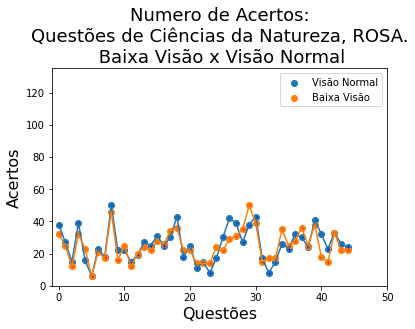

In [132]:
x = acertos_normal_pd_cn
y = acertos_normal_pd_cn.index

x1 = acertos_bv_pd_cn
y1 = acertos_bv_pd_cn.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Ciências da Natureza, ROSA.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

#### 3.3.3 Filtrando os dados da prova ROSA de **Ciências Humanas**:

##### 3.3.3.1 Pessoas com visão normal:


In [133]:
# Buscando no data frame a prova de CH das pessoas com visão normal:
prova_ch_normal = dados_normais[dados_normais.CO_PROVA_CH==510]
prova_ch_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CH', 'TX_GABARITO_CH']
p_ch_normal = prova_ch_normal.filter(items = P)

respostas_ch_normal = p_ch_normal['TX_RESPOSTAS_CH']
gabarito_ch_normal = p_ch_normal['TX_GABARITO_CH']

In [134]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_ch = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_ch_normal[j]
    linha_do_gabarito = gabarito_ch_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_ch[i] = acertos_normais_ch[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.3.3.2 Pessoas com baixa visão:

In [135]:
# Buscando no data frame a prova de CH das pessoas com baixa visão:
prova_ch_bv = dados_bv[dados_bv.CO_PROVA_CH==510]
prova_ch_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_CH', 'TX_GABARITO_CH']
p_ch_bv = prova_ch_bv.filter(items = P)

respostas_ch_bv = p_ch_bv['TX_RESPOSTAS_CH']
gabarito_ch_bv = p_ch_bv['TX_GABARITO_CH']

In [136]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_ch = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_ch_bv[j]
    linha_do_gabarito = gabarito_ch_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_ch[i] = acertos_bv_ch[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.3.4 Gráfico dos acertos da prova ROSA de **Ciências Humanas** dos participantes de baixa visão e visão normal:

In [137]:
acertos_normal_pd_ch = pd.DataFrame(acertos_normais_ch)
acertos_bv_pd_ch = pd.DataFrame(acertos_bv_ch)

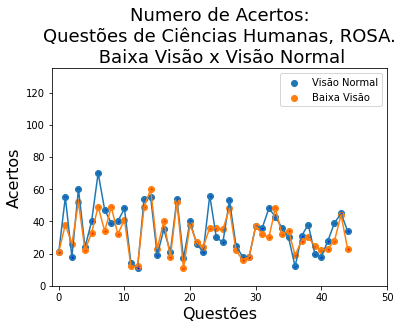

In [138]:
x = acertos_normal_pd_ch
y = acertos_normal_pd_ch.index

x1 = acertos_bv_pd_ch
y1 = acertos_bv_pd_ch.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Ciências Humanas, ROSA.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

#### 3.3.5 Filtrando os dados da prova ROSA de **Linguagens**:


##### 3.3.5.1 Pessoas com visão normal:

In [139]:
# Buscando no data frame a prova de LC das pessoas com visão normal:
prova_lc_normal = dados_normais[dados_normais.CO_PROVA_LC==513]
prova_lc_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_LC', 'TX_GABARITO_LC']
p_lc_normal = prova_lc_normal.filter(items = P)

respostas_lc_normal = p_lc_normal['TX_RESPOSTAS_LC']
gabarito_lc_normal = p_lc_normal['TX_GABARITO_LC']

In [140]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_lc = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_lc_normal[j]
    linha_do_gabarito = gabarito_lc_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_lc[i] = acertos_normais_lc[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.3.5.2 Pessoas com baixa visão:


In [141]:
# Buscando no data frame a prova de LC das pessoas com baixa visão:
prova_lc_bv = dados_bv[dados_bv.CO_PROVA_LC==513]
prova_lc_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_LC', 'TX_GABARITO_LC']
p_lc_bv = prova_lc_bv.filter(items = P)

respostas_lc_bv = p_lc_bv['TX_RESPOSTAS_LC']
gabarito_lc_bv = p_lc_bv['TX_GABARITO_LC']

In [142]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_lc = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_lc_bv[j]
    linha_do_gabarito = gabarito_lc_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_lc[i] = acertos_bv_lc[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.3.6 Gráfico dos acertos da prova ROSA de **Linguagens** dos participantes de baixa visão e visão normal:


In [143]:
acertos_normal_pd_lc = pd.DataFrame(acertos_normais_lc)
acertos_bv_pd_lc = pd.DataFrame(acertos_bv_lc)

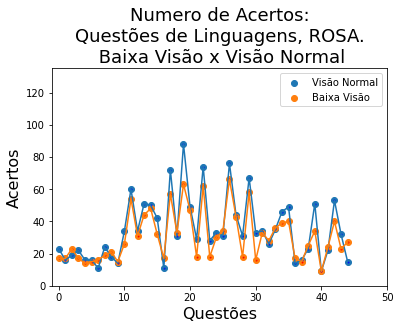

In [144]:
x = acertos_normal_pd_lc
y = acertos_normal_pd_lc.index

x1 = acertos_bv_pd_lc
y1 = acertos_bv_pd_lc.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Linguagens, ROSA.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()

#### 3.3.7 Filtrando os dados da prova ROSA de **Matemática**:


##### 3.3.7.1 Pessoas com visão normal:


In [145]:
# Buscando no data frame a prova de MT das pessoas com visão normal:
prova_mt_normal = dados_normais[dados_normais.CO_PROVA_MT==517]
prova_mt_normal.reset_index(inplace=True)

P = ['TX_RESPOSTAS_MT', 'TX_GABARITO_MT']
p_mt_normal = prova_mt_normal.filter(items = P)

respostas_mt_normal = p_mt_normal['TX_RESPOSTAS_MT']
gabarito_mt_normal = p_mt_normal['TX_GABARITO_MT']

In [146]:
# Quantidade de acertos das pessoas com visão normal:
acertos_normais_mt = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_mt_normal[j]
    linha_do_gabarito = gabarito_mt_normal[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_normais_mt[i] = acertos_normais_mt[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

##### 3.3.7.2 Pessoas com baixa visão:


In [147]:
# Buscando no data frame a prova de MT das pessoas com baixa visão:
prova_mt_bv = dados_bv[dados_bv.CO_PROVA_MT==517]
prova_mt_bv.reset_index(inplace=True)

P = ['TX_RESPOSTAS_MT', 'TX_GABARITO_MT']
p_mt_bv = prova_mt_bv.filter(items = P)

respostas_mt_bv = p_mt_bv['TX_RESPOSTAS_MT']
gabarito_mt_bv = p_mt_bv['TX_GABARITO_MT']

In [148]:
# Quantidade de acertos das pessoas com baixa visão:
acertos_bv_mt = [0]*45
for i in range(0, 45):
  for j in range(0, 98):
    linha_da_resposta = respostas_mt_bv[j]
    linha_do_gabarito = gabarito_mt_bv[j]
        
    resposta_candidato = linha_da_resposta[i]
    resposta_gabarito = linha_do_gabarito[i]
        
    if resposta_candidato == resposta_gabarito:
      acertos_bv_mt[i] = acertos_bv_mt[i] + 1
      resposta_candidato = ''
      resposta_gabarito = ''

#### 3.3.8 Gráfico dos acertos da prova ROSA de **Matemática** dos participantes de baixa visão e visão normal:

In [149]:
acertos_normal_pd_mt = pd.DataFrame(acertos_normais_mt)
acertos_bv_pd_mt = pd.DataFrame(acertos_bv_mt)

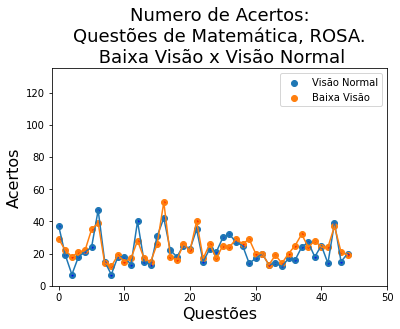

In [150]:
x = acertos_normal_pd_mt
y = acertos_normal_pd_mt.index

x1 = acertos_bv_pd_mt
y1 = acertos_bv_pd_mt.index

plt.scatter(y, x)
ax = plt.scatter(y1, x1)
plt.ylabel('Acertos', fontsize=16)
plt.xlabel('Questões', fontsize=16)
plt.title('Numero de Acertos:\nQuestões de Matemática, ROSA.\n Baixa Visão x Visão Normal', fontsize = 18)

limits = [-1,50]
limits1 = [0,135]
sec_lim = 1000
bp = 45

ax = plt.gca()
ax.set_xlim(limits)
ax.set_ylim(limits1)
ax.scatter(y, x, s=1, c='blue', alpha=1)
ax.scatter(y1, x1, s=1, c='red', alpha=1)

legends=['Visão Normal', 'Baixa Visão']
plt.legend(legends)

plt.plot(x)
plt.plot(x1)
plt.show()